# Keras `Model` 클래스

* `Sequential` 클래스외에 더 유연한 `Model` 클래스 제공
* Keras의 `Model` 클래스 객체와 레이어(`Tensor`) 객체는 callable 객체.
* 다른 레이어(`Tensor`) 객체를 입력으로 호출하면 그 레이어를 입력으로 가지는 복합 레이어 객체가 된다.
* `Model` 클래스  객체는 `Input` 레이어와 그 `Input` 레이어에 연결된 다른 레이어를 출력으로 주어 생성.
* `Model` 클래스  객체도 다른 레이어(텐서)를 입력으로 호출하면 그 레이어를 입력으로 가지는 복합 레이어가 된다.

In [24]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential

In [25]:
# sample weights
np.random.seed(0)
w = 0.5 * np.random.normal(size=(4, 4))
b = np.zeros((4))

In [26]:
model1 = Sequential(name="model1")
model1.add(Dense(4, activation='sigmoid', input_shape=(4,), weights=(w, b), name="dense1"))
type(model1)

keras.models.Sequential

In [27]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


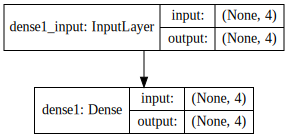

In [28]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model1, show_shapes=True).create(prog='dot', format='svg'))

In [29]:
input_layer2 = Input(shape=(4,), name="input2")
hidden_layer2 = Dense(4, activation='sigmoid', weights=(w, b), name="dense2")(input_layer2)
model2 = Model(input_layer2, hidden_layer2, name="model2")
type(model2)

keras.engine.training.Model

In [30]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (InputLayer)          (None, 4)                 0         
_________________________________________________________________
dense2 (Dense)               (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


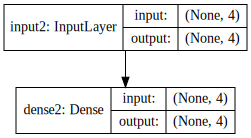

In [31]:
SVG(model_to_dot(model2, show_shapes=True).create(prog='dot', format='svg'))

In [32]:
model3 = Model(input_layer2, model1(input_layer2), name="model3")
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (InputLayer)          (None, 4)                 0         
_________________________________________________________________
model1 (Sequential)          (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


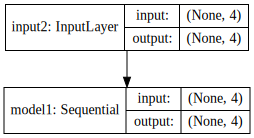

In [33]:
SVG(model_to_dot(model3, show_shapes=True).create(prog='dot', format='svg'))

In [34]:
input_layer4 = Input(shape=(4,), name="input4")
model4 = Model(input_layer4, model2(input_layer4), name="model4")
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input4 (InputLayer)          (None, 4)                 0         
_________________________________________________________________
model2 (Model)               (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


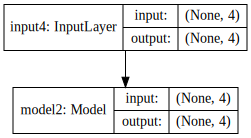

In [35]:
SVG(model_to_dot(model4, show_shapes=True).create(prog='dot', format='svg'))

In [36]:
data = np.ones((1, 4))

In [37]:
y = 1 / (1 + np.exp(-(w.T).dot(data.T)))
y

array([[0.89517384],
       [0.49439434],
       [0.7787448 ],
       [0.87421386]])

In [38]:
model1.predict(data)

array([[0.89517385, 0.49439433, 0.7787448 , 0.8742138 ]], dtype=float32)

In [39]:
model2.predict(data)

array([[0.89517385, 0.49439433, 0.7787448 , 0.8742138 ]], dtype=float32)

In [40]:
model3.predict(data)

array([[0.89517385, 0.49439433, 0.7787448 , 0.8742138 ]], dtype=float32)

In [41]:
model4.predict(data)

array([[0.89517385, 0.49439433, 0.7787448 , 0.8742138 ]], dtype=float32)

## Serial Model

* 모델을 직렬로 연결하려면 모델을 레이어로 변환하기 위해 추가적인 `Input` 레이어가 필요

In [42]:
input_5 = Input(shape=(4,), name="input5")
model5 = Model(input_5, model2(model1(input_5)), name="model5")

In [43]:
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input5 (InputLayer)          (None, 4)                 0         
_________________________________________________________________
model1 (Sequential)          (None, 4)                 20        
_________________________________________________________________
model2 (Model)               (None, 4)                 20        
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


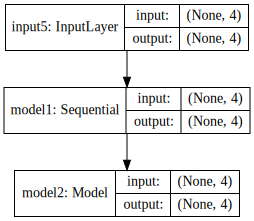

In [44]:
SVG(model_to_dot(model5, show_shapes=True).create(prog='dot', format='svg'))

In [45]:
model5.predict(data)

array([[0.82399994, 0.53757536, 0.71565944, 0.8425977 ]], dtype=float32)

In [46]:
y2 = 1 / (1 + np.exp(-(w.T).dot(y)))
y2.T

array([[0.82399994, 0.5375754 , 0.71565945, 0.84259771]])